# HW09: KNN, SVMs, and Random Forest for handwriting recognition



**Chaithra K C**

1. Introduction
2. Data preparation
    1. Load data
    2. Check for null and missing values
    3. Split training and valdiation set
3. K Nearest Neighbor Classifier
    1. Define the model
    2. Choosing the K-Value
    3. Evaluate the model
4. Support Vector Machine
    1. Define the model
    2. Evaluate the model
5. Prediction and submition to Kaggle
    1. Predict and Submit results

#### 1. INTRODUCTION

The data set comes from the Kaggle Digit Recognizer competition. The goal is to recognize digits 0 to 9 in handwriting images.
We construct prediction models using naïve Bayes and decision tree algorithms. Tune their parameters to get the best model (measured by cross validation) and compare which algorithms provide better model for this task.



#### 2. DATA PREPARATION

In [59]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix

#### 2.1 LOAD DATA

In [60]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((42000, 785), (28000, 784))

In [61]:
train.head() # vieweing first 5 rows to understand the dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.2 CHECK FOR NULL OR NAN VALUES

In [63]:
#sns.heatmap(train.isnull()) # no null or NA values in training data # plotting takes time

In [64]:
#sns.heatmap(test.isnull()) # no null or NA values in testing data # plotting takes time

There are no Null or NA values present in the dataset of both train and test.

#### 2.3 SPLIT TRAINING AND VALIDATION SET

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

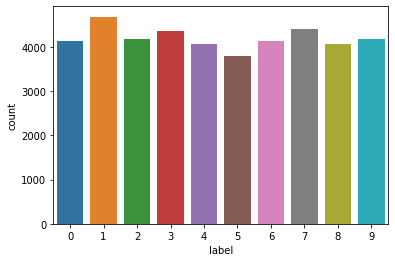

In [65]:
Y_train = train["label"]

# dropping the 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

g = sns.countplot(Y_train)

Y_train.value_counts()

We have similar counts for the 10 digits.

In [66]:
Y_train[0]

1

**We can get a better sense for one of these examples by visualising the image and looking at the label**

1


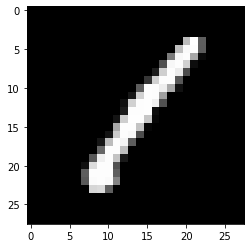

In [67]:
# visualizing the digits for few training example
print(Y_train[0])
training_example = X_train.iloc[0]
training_example = training_example.to_numpy() # converting series to numpy array
training_example = training_example.reshape((28,28)) # converting 1d array of pixels to 2d (28X28) pixels matrix
plt.imshow(training_example, cmap='gray')

8


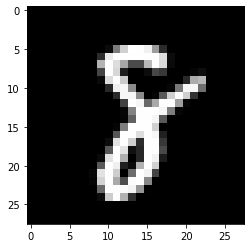

In [68]:
print(Y_train[300])
training_example = X_train.iloc[300]
training_example = training_example.to_numpy() # converting series to numpy array
training_example = training_example.reshape((28,28)) # converting 1d array of pixels to 2d (28X28) pixels matrix
plt.imshow(training_example, cmap='gray')

A small fraction (40%) became the validation set which the model is evaluated and the rest (60%) is used to train the model

In [69]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.4, random_state=30)

# K Nearest Neighbor

In [70]:
from sklearn.neighbors import KNeighborsClassifier


In [71]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [72]:
knn_pred = knn.predict(X_val)

In [73]:
# Look at confusion matrix 
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

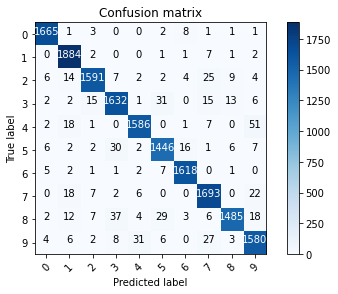

In [74]:
# compute the confusion matrix
confusion_knn = confusion_matrix(Y_val, knn_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_knn, classes = range(10)) 

In [75]:
print(classification_report(Y_val,knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1682
           1       0.96      0.99      0.98      1898
           2       0.98      0.96      0.97      1664
           3       0.95      0.95      0.95      1717
           4       0.97      0.95      0.96      1666
           5       0.95      0.95      0.95      1518
           6       0.98      0.99      0.98      1637
           7       0.95      0.97      0.96      1748
           8       0.98      0.93      0.95      1603
           9       0.93      0.95      0.94      1667

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



3.2 Choosing the K-Value

Using elbow method to pick a good K Value:

In [76]:
error_rate = []

# Will take some time. Finding optimal K value between 1 - 15
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != Y_val)) # error rate

Text(0, 0.5, 'Error Rate')

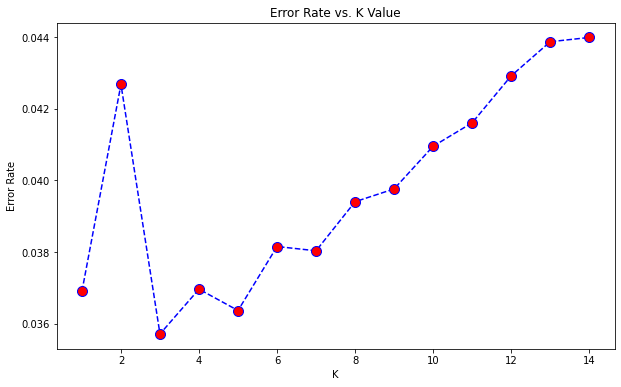

In [77]:
# plotting the error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that for K=3 has the lowest error rate of ~0.0350. We can retrain the model with that and check the classification report!

WITH K=3




              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1682
           1       0.95      0.99      0.97      1898
           2       0.98      0.95      0.96      1664
           3       0.95      0.96      0.96      1717
           4       0.97      0.95      0.96      1666
           5       0.96      0.95      0.96      1518
           6       0.98      0.99      0.99      1637
           7       0.96      0.97      0.96      1748
           8       0.98      0.91      0.95      1603
           9       0.94      0.95      0.95      1667

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



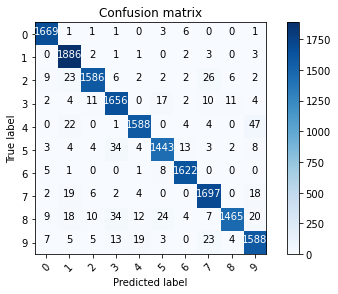

In [78]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_val)

print('WITH K=3')
print('\n')
# compute the confusion matrix
confusion_knn = confusion_matrix(Y_val, knn_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_knn, classes = range(10)) 
print('\n')
print(classification_report(Y_val,knn_pred))

# Support Vector Machine